We will learn to implement Data preprocessing to perform the following operations on a raw dataset:

•	Dealing with missing data

•	Dealing with categorical data

•	Splitting the dataset into training and testing sets

•	Scaling the features


In [ ]:
import pandas as pd
import numpy as np
data=pd.DataFrame({'age':[24,25,np.nan,30,40,35,49,np.nan],'salary':[42000,np.nan,47000,52000,35000,49000,np.nan,52200]})
data

age   salary
0  24.0  42000.0
1  25.0      NaN
2   NaN  47000.0
3  30.0  52000.0
4  40.0  35000.0
5  35.0  49000.0
6  49.0      NaN
7   NaN  52200.0

**Dealing with Missing Data:**

We have already noticed the missing fields in the data denoted by “nan. Machine learning models cannot accommodate missing fields in the data they are provided with. 

So the missing fields must be filled with values that will not affect the variance of the data or make it more noisy.

The scikit-learn library’s **SimpleImputer** Class allows us to impute the missing fields in a dataset with valid data.

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value=-99) # strategy can consists of values such as ‘mean’, ‘median’, ‘most_frequent’ can be used with strings 
#or numeric data , ‘constant’ replace missing value with fill_value: can be used with strings or #numeric data.
data1=data.copy()
data1 = imp.fit_transform(data1)

print(data1)



[[ 2.40e+01  4.20e+04]
 [ 2.50e+01 -9.90e+01]
 [-9.90e+01  4.70e+04]
 [ 3.00e+01  5.20e+04]
 [ 4.00e+01  3.50e+04]
 [ 3.50e+01  4.90e+04]
 [ 4.90e+01 -9.90e+01]
 [-9.90e+01  5.22e+04]]


In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy="mean") # strategy can consists of values such as ‘mean’, ‘median’, ‘most_frequent’ can be used with strings 
#or numeric data , ‘constant’ replace missing value with fill_value: can be used with strings or #numeric data.

data1 = imp.fit_transform(data)

print(data1)


[[2.40000000e+01 4.20000000e+04]
 [2.50000000e+01 4.62000000e+04]
 [3.38333333e+01 4.70000000e+04]
 [3.00000000e+01 5.20000000e+04]
 [4.00000000e+01 3.50000000e+04]
 [3.50000000e+01 4.90000000e+04]
 [4.90000000e+01 4.62000000e+04]
 [3.38333333e+01 5.22000000e+04]]


**Dealing with Categorical Data**

When dealing with large and real-world datasets, categorical data is almost inevitable. Categorical variables represent types of data which may be divided into groups. 
Label Encoder:
Label Encoding in Python can be achieved using Sklearn Library. Sklearn provides a very efficient tool for encoding the levels of categorical features into numeric values. LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier.


In [ ]:
data['Designation']=pd.Series(['emp','emp','mgr','emp','emp','emp','emp','dg'])

In [ ]:
data

age   salary Designation
0  24.0  42000.0         emp
1  25.0      NaN         emp
2   NaN  47000.0         mgr
3  30.0  52000.0         emp
4  40.0  35000.0         emp
5  35.0  49000.0         emp
6  49.0      NaN         emp
7   NaN  52200.0          dg

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df=data.copy()
df['Designation']=le.fit_transform(df['Designation'])

print(df)



    age   salary  Designation
0  24.0  42000.0            1
1  25.0      NaN            1
2   NaN  47000.0            2
3  30.0  52000.0            1
4  40.0  35000.0            1
5  35.0  49000.0            1
6  49.0      NaN            1
7   NaN  52200.0            0


The categorical values have been converted into numeric values.

That’s all label encoding is about. 

But depending on the data, **label encoding introduces a new problem.** 

For example, we have encoded a set of country names into numerical data. This is actually categorical data and there is no relation, of any kind, between the rows.

The problem here is since there are different numbers in the same column, the model will misunderstand the data to be in some kind of order, 0 < 1 <2.

To overcome this problem, we use** One Hot Encoder.**


**One Hot Encoder:**
Now, as we already discussed, depending on the data we have, we might run into situations where, after label encoding, we might confuse our model into thinking that a column has data with some kind of order or hierarchy when we clearly don’t have it. To avoid this, we ‘OneHotEncode’ that column.


In [ ]:
data


age   salary Designation
0  24.0  42000.0         emp
1  25.0      NaN         emp
2   NaN  47000.0         mgr
3  30.0  52000.0         emp
4  40.0  35000.0         emp
5  35.0  49000.0         emp
6  49.0      NaN         emp
7   NaN  52200.0          dg

In [ ]:
data1=data.iloc[:,-1:]
print(data1)

  Designation
0         emp
1         emp
2         mgr
3         emp
4         emp
5         emp
6         emp
7          dg


In [ ]:
from sklearn.preprocessing import OneHotEncoder
Ohe=OneHotEncoder()

df=Ohe.fit_transform(data1).toarray()
df


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

**Scaling the features:**
Since machine learning models rely on numbers to solve relations it is important to have similarly scaled data in a dataset. Scaling ensures that all data in a dataset falls in the same range. 

Unscaled data can cause inaccurate or false predictions. Some machine learning algorithms can handle feature scaling on its own and doesn’t require it explicitly.


**1.	StandardScaler:**
The StandardScaler class from the scikit-learn library can help us scale the dataset. 

It is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.

It is most suitable for techniques that assume a Gaussian distribution in the input variables and work better with rescaled data, such as linear regression, logistic regression and linear discriminate analysis.

The standard score of a sample x is calculated as:

**z = (x - u) / s**

where u is the mean of the training samples, and s is the standard deviation of the training samples.

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.


In [ ]:
import pandas as pd
df=pd.read_csv( 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv ',sep=';')
array=df.values
#Separating data into input and output components
x=array[:,0:8]
y=array[:,8]
print(x)



[[7.4000e+00 7.0000e-01 0.0000e+00 ... 1.1000e+01 3.4000e+01 9.9780e-01]
 [7.8000e+00 8.8000e-01 0.0000e+00 ... 2.5000e+01 6.7000e+01 9.9680e-01]
 [7.8000e+00 7.6000e-01 4.0000e-02 ... 1.5000e+01 5.4000e+01 9.9700e-01]
 ...
 [6.3000e+00 5.1000e-01 1.3000e-01 ... 2.9000e+01 4.0000e+01 9.9574e-01]
 [5.9000e+00 6.4500e-01 1.2000e-01 ... 3.2000e+01 4.4000e+01 9.9547e-01]
 [6.0000e+00 3.1000e-01 4.7000e-01 ... 1.8000e+01 4.2000e+01 9.9549e-01]]


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x)
x_train=pd.DataFrame(x_train)
print(x_train)

             0         1         2  ...         5         6         7
0    -0.528360  0.961877 -1.391472  ... -0.466193 -0.379133  0.558274
1    -0.298547  1.967442 -1.391472  ...  0.872638  0.624363  0.028261
2    -0.298547  1.297065 -1.186070  ... -0.083669  0.229047  0.134264
3     1.654856 -1.384443  1.484154  ...  0.107592  0.411500  0.664277
4    -0.528360  0.961877 -1.391472  ... -0.466193 -0.379133  0.558274
...        ...       ...       ...  ...       ...       ...       ...
1594 -1.217796  0.403229 -0.980669  ...  1.542054 -0.075043 -0.978765
1595 -1.390155  0.123905 -0.877968  ...  2.211469  0.137820 -0.862162
1596 -1.160343 -0.099554 -0.723916  ...  1.255161 -0.196679 -0.533554
1597 -1.390155  0.654620 -0.775267  ...  1.542054 -0.075043 -0.676657
1598 -1.332702 -1.216849  1.021999  ...  0.203223 -0.135861 -0.666057

[1599 rows x 8 columns]


**2.	MinMaxScalar :**
Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

The transformation is given by:

**X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))**

**X_scaled = X_std * (max - min) + min** 

where min, max = feature_range.


This transformation is often used as an alternative to zero mean, unit variance scaling.


In [ ]:
array1=df.values
#Separating data into input and output components
x1=array1[:,0:8]
y1=array1[:,8]
print(x1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
x1 = scaler.fit_transform(x1)
x1=pd.DataFrame(x1)
print(x1)


[[7.4000e+00 7.0000e-01 0.0000e+00 ... 1.1000e+01 3.4000e+01 9.9780e-01]
 [7.8000e+00 8.8000e-01 0.0000e+00 ... 2.5000e+01 6.7000e+01 9.9680e-01]
 [7.8000e+00 7.6000e-01 4.0000e-02 ... 1.5000e+01 5.4000e+01 9.9700e-01]
 ...
 [6.3000e+00 5.1000e-01 1.3000e-01 ... 2.9000e+01 4.0000e+01 9.9574e-01]
 [5.9000e+00 6.4500e-01 1.2000e-01 ... 3.2000e+01 4.4000e+01 9.9547e-01]
 [6.0000e+00 3.1000e-01 4.7000e-01 ... 1.8000e+01 4.2000e+01 9.9549e-01]]
             0         1     2  ...         5         6         7
0     0.247788  0.397260  0.00  ...  0.140845  0.098940  0.567548
1     0.283186  0.520548  0.00  ...  0.338028  0.215548  0.494126
2     0.283186  0.438356  0.04  ...  0.197183  0.169611  0.508811
3     0.584071  0.109589  0.56  ...  0.225352  0.190813  0.582232
4     0.247788  0.397260  0.00  ...  0.140845  0.098940  0.567548
...        ...       ...   ...  ...       ...       ...       ...
1594  0.141593  0.328767  0.08  ...  0.436620  0.134276  0.354626
1595  0.115044  0.294521  0.

**3.	Normalization**
Normalization is the process of scaling individual samples to have unit norm. 

In basic terms you need to normalize data when the algorithm predicts based on the weighted relationships formed between data points. Scaling inputs to unit norms is a common operation for text classification or clustering.


One of the key differences between scaling (e.g. standardizing) and normalizing, is that **normalizing is a row-wise operation, while scaling is a column-wise operation.**


In [ ]:
array2=df.values
#Separating data into input and output components
x2=array2[:,0:8]
y2=array2[:,8]
print(x2)

from sklearn.preprocessing import Normalizer
nr=Normalizer()
x2_train=nr.fit_transform(x2)
x2_train=pd.DataFrame(x2_train)
print(x2_train)

[[7.4000e+00 7.0000e-01 0.0000e+00 ... 1.1000e+01 3.4000e+01 9.9780e-01]
 [7.8000e+00 8.8000e-01 0.0000e+00 ... 2.5000e+01 6.7000e+01 9.9680e-01]
 [7.8000e+00 7.6000e-01 4.0000e-02 ... 1.5000e+01 5.4000e+01 9.9700e-01]
 ...
 [6.3000e+00 5.1000e-01 1.3000e-01 ... 2.9000e+01 4.0000e+01 9.9574e-01]
 [5.9000e+00 6.4500e-01 1.2000e-01 ... 3.2000e+01 4.4000e+01 9.9547e-01]
 [6.0000e+00 3.1000e-01 4.7000e-01 ... 1.8000e+01 4.2000e+01 9.9549e-01]]
             0         1         2  ...         5         6         7
0     0.202390  0.019145  0.000000  ...  0.300850  0.929899  0.027290
1     0.108340  0.012223  0.000000  ...  0.347243  0.930611  0.013845
2     0.137699  0.013417  0.000706  ...  0.264805  0.953297  0.017601
3     0.176659  0.004416  0.008833  ...  0.268143  0.946386  0.015742
4     0.202390  0.019145  0.000000  ...  0.300850  0.929899  0.027290
...        ...       ...       ...  ...       ...       ...       ...
1594  0.113124  0.010948  0.001460  ...  0.583867  0.802818  0.018

In [ ]:
data

age   salary
0  24.0  42000.0
1  25.0      NaN
2   NaN  47000.0
3  30.0  52000.0
4  40.0  35000.0
5  35.0  49000.0
6  49.0      NaN
7   NaN  52200.0

In [ ]:
data['age']=[12,20,18,40,90,10,34,11]
data

age   salary
0   12  42000.0
1   20      NaN
2   18  47000.0
3   40  52000.0
4   90  35000.0
5   10  49000.0
6   34      NaN
7   11  52200.0

In [ ]:
from sklearn.preprocessing import  Binarizer
bin=Binarizer(threshold=19)

df=data.values
df=bin.fit_transform(df[:,0:1])
df

array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.]])

In [ ]:
from google.colab import files
files.upload()

Saving speeddating.csv to speeddating.csv


{'speeddating.csv': b'"has_null","wave","gender","age","age_o","d_age","d_d_age","race","race_o","samerace","importance_same_race","importance_same_religion","d_importance_same_race","d_importance_same_religion","field","pref_o_attractive","pref_o_sincere","pref_o_intelligence","pref_o_funny","pref_o_ambitious","pref_o_shared_interests","d_pref_o_attractive","d_pref_o_sincere","d_pref_o_intelligence","d_pref_o_funny","d_pref_o_ambitious","d_pref_o_shared_interests","attractive_o","sinsere_o","intelligence_o","funny_o","ambitous_o","shared_interests_o","d_attractive_o","d_sinsere_o","d_intelligence_o","d_funny_o","d_ambitous_o","d_shared_interests_o","attractive_important","sincere_important","intellicence_important","funny_important","ambtition_important","shared_interests_important","d_attractive_important","d_sincere_important","d_intellicence_important","d_funny_important","d_ambtition_important","d_shared_interests_important","attractive","sincere","intelligence","funny","ambition"

In [ ]:
import pandas as pd
data=pd.read_csv('speeddating.csv',na_values='?')

In [ ]:
data.head(2)

has_null  wave  gender   age  ...  met  decision decision_o match
0         0     1  female  21.0  ...  0.0         1          0     0
1         0     1  female  21.0  ...  1.0         1          0     0

[2 rows x 123 columns]

In [ ]:
cols=data.columns
print(cols)

Index(['has_null', 'wave', 'gender', 'age', 'age_o', 'd_age', 'd_d_age',
       'race', 'race_o', 'samerace',
       ...
       'd_expected_num_interested_in_me', 'd_expected_num_matches', 'like',
       'guess_prob_liked', 'd_like', 'd_guess_prob_liked', 'met', 'decision',
       'decision_o', 'match'],
      dtype='object', length=123)


In [ ]:
cat_cols=data.select_dtypes(include=['object']).columns.tolist()
print(cat_cols)

['gender', 'd_d_age', 'race', 'race_o', 'd_importance_same_race', 'd_importance_same_religion', 'field', 'd_pref_o_attractive', 'd_pref_o_sincere', 'd_pref_o_intelligence', 'd_pref_o_funny', 'd_pref_o_ambitious', 'd_pref_o_shared_interests', 'd_attractive_o', 'd_sinsere_o', 'd_intelligence_o', 'd_funny_o', 'd_ambitous_o', 'd_shared_interests_o', 'd_attractive_important', 'd_sincere_important', 'd_intellicence_important', 'd_funny_important', 'd_ambtition_important', 'd_shared_interests_important', 'd_attractive', 'd_sincere', 'd_intelligence', 'd_funny', 'd_ambition', 'd_attractive_partner', 'd_sincere_partner', 'd_intelligence_partner', 'd_funny_partner', 'd_ambition_partner', 'd_shared_interests_partner', 'd_sports', 'd_tvsports', 'd_exercise', 'd_dining', 'd_museums', 'd_art', 'd_hiking', 'd_gaming', 'd_clubbing', 'd_reading', 'd_tv', 'd_theater', 'd_movies', 'd_concerts', 'd_music', 'd_shopping', 'd_yoga', 'd_interests_correlate', 'd_expected_happy_with_sd_people', 'd_expected_num_

In [ ]:
int_cols=data.select_dtypes(exclude=['object']).columns.tolist()
print(int_cols)

['has_null', 'wave', 'age', 'age_o', 'd_age', 'samerace', 'importance_same_race', 'importance_same_religion', 'pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests', 'attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o', 'attractive_important', 'sincere_important', 'intellicence_important', 'funny_important', 'ambtition_important', 'shared_interests_important', 'attractive', 'sincere', 'intelligence', 'funny', 'ambition', 'attractive_partner', 'sincere_partner', 'intelligence_partner', 'funny_partner', 'ambition_partner', 'shared_interests_partner', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'interests_correlate', 'expected_happy_with_sd_people', 'expected_num_interested_in_me', 'expected_num_matches', 'like', 'guess_prob_liked', 'met', 'decision', 'de

In [ ]:
#Imputation for integer columns
import numpy as np
#data=data.replace('?',np.NAN)

from sklearn.impute import SimpleImputer
sm=SimpleImputer(missing_values=np.NAN, strategy='mean')
data[int_cols]=sm.fit_transform(data[int_cols])


In [ ]:
data[cat_cols]

gender d_d_age  ... d_like d_guess_prob_liked
0     female   [4-6]  ...  [6-8]              [5-6]
1     female   [0-1]  ...  [6-8]              [5-6]
2     female   [0-1]  ...  [6-8]              [0-4]
3     female   [2-3]  ...  [6-8]              [5-6]
4     female   [2-3]  ...  [6-8]              [5-6]
...      ...     ...  ...    ...                ...
8373    male   [0-1]  ...  [0-5]              [5-6]
8374    male   [0-1]  ...  [0-5]              [0-4]
8375    male   [4-6]  ...  [6-8]              [5-6]
8376    male   [2-3]  ...  [0-5]              [5-6]
8377    male   [2-3]  ...  [0-5]              [5-6]

[8378 rows x 59 columns]

In [ ]:
data['race'].dtype

dtype('O')

In [ ]:
#Imputation incase you have '? in your dataset and attributes are mixed.....
data=data.replace('?',np.NAN)
data_clean = data.apply(lambda x: x.fillna(x.value_counts().index[0]))
data_clean

has_null  wave  gender   age  ...  met  decision decision_o match
0          0.0   1.0  female  21.0  ...  0.0       1.0        0.0   0.0
1          0.0   1.0  female  21.0  ...  1.0       1.0        0.0   0.0
2          1.0   1.0  female  21.0  ...  1.0       1.0        1.0   1.0
3          0.0   1.0  female  21.0  ...  0.0       1.0        1.0   1.0
4          0.0   1.0  female  21.0  ...  0.0       1.0        1.0   1.0
...        ...   ...     ...   ...  ...  ...       ...        ...   ...
8373       1.0  21.0    male  25.0  ...  0.0       0.0        1.0   0.0
8374       1.0  21.0    male  25.0  ...  0.0       0.0        0.0   0.0
8375       1.0  21.0    male  25.0  ...  0.0       0.0        0.0   0.0
8376       1.0  21.0    male  25.0  ...  0.0       0.0        1.0   0.0
8377       1.0  21.0    male  25.0  ...  0.0       0.0        1.0   0.0

[8378 rows x 123 columns]

In [ ]:
X=data_clean.copy()
for i in range(X.shape[0]):
  X['race'][i] = data_clean['race'][i].split('/')
  X['race_o'][i] = data_clean['race_o'][i].split('/')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
X.head(5)

has_null  wave  gender   age  ...  met  decision decision_o match
0       0.0   1.0  female  21.0  ...  0.0       1.0        0.0   0.0
1       0.0   1.0  female  21.0  ...  1.0       1.0        0.0   0.0
2       1.0   1.0  female  21.0  ...  1.0       1.0        1.0   1.0
3       0.0   1.0  female  21.0  ...  0.0       1.0        1.0   1.0
4       0.0   1.0  female  21.0  ...  0.0       1.0        1.0   1.0

[5 rows x 123 columns]

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer


mlb=MultiLabelBinarizer()
race_encoded=mlb.fit_transform(X['race'])
race_o_encoded=mlb.fit_transform(X['race_o'])

In [ ]:
mlb.classes_

array(["'Asian", "'Black", "'Latino", "African American'",
       "Asian-American'", 'Caucasian-American', 'European',
       "Hispanic American'", 'Other', 'Pacific Islander'], dtype=object)

In [ ]:
X = X.drop(['race', 'race_o'], axis=1)
X.join(pd.DataFrame(race_encoded))
X.join(pd.DataFrame(race_o_encoded))

has_null  wave  gender   age  age_o  d_age d_d_age  ...  3  4  5  6  7  8  9
0          0.0   1.0  female  21.0   27.0    6.0   [4-6]  ...  0  0  1  1  0  0  0
1          0.0   1.0  female  21.0   22.0    1.0   [0-1]  ...  0  0  1  1  0  0  0
2          1.0   1.0  female  21.0   22.0    1.0   [0-1]  ...  0  1  0  0  0  0  1
3          0.0   1.0  female  21.0   23.0    2.0   [2-3]  ...  0  0  1  1  0  0  0
4          0.0   1.0  female  21.0   24.0    3.0   [2-3]  ...  0  0  0  0  1  0  0
...        ...   ...     ...   ...    ...    ...     ...  ... .. .. .. .. .. .. ..
8373       1.0  21.0    male  25.0   26.0    1.0   [0-1]  ...  0  0  0  0  1  0  0
8374       1.0  21.0    male  25.0   24.0    1.0   [0-1]  ...  0  0  0  0  0  1  0
8375       1.0  21.0    male  25.0   29.0    4.0   [4-6]  ...  0  0  0  0  1  0  0
8376       1.0  21.0    male  25.0   22.0    3.0   [2-3]  ...  0  1  0  0  0  0  1
8377       1.0  21.0    male  25.0   22.0    3.0   [2-3]  ...  0  1  0  0  0  0  1

[8378 rows x 131 columns]

In [ ]:
X.dtypes

has_null              float64
wave                  float64
gender                 object
age                   float64
age_o                 float64
                       ...   
d_guess_prob_liked     object
met                   float64
decision              float64
decision_o            float64
match                 float64
Length: 121, dtype: object

In [ ]:
import json
x='[1-4]'
x=x.replace('-',',')
print(x)
print(type(x))
print(x[0])
#print(int(x[1])+int(x[3]))
print(sum(json.loads(x))/2)

[1,4]
<class 'str'>
[
2.5


In [ ]:
for col in cat_cols:
  print(X[col])

0       female
1       female
2       female
3       female
4       female
         ...  
8373      male
8374      male
8375      male
8376      male
8377      male
Name: gender, Length: 8378, dtype: object
0       21
1       21
2       21
3       21
4       21
        ..
8373    25
8374    25
8375    25
8376    25
8377    25
Name: age, Length: 8378, dtype: object
0       27
1       22
2       22
3       23
4       24
        ..
8373    26
8374    24
8375    29
8376    22
8377    22
Name: age_o, Length: 8378, dtype: object
0       [4-6]
1       [0-1]
2       [0-1]
3       [2-3]
4       [2-3]
        ...  
8373    [0-1]
8374    [0-1]
8375    [4-6]
8376    [2-3]
8377    [2-3]
Name: d_d_age, Length: 8378, dtype: object
0       1
1       1
2       1
3       1
4       1
       ..
8373    0
8374    0
8375    0
8376    0
8377    0
Name: race, Length: 8378, dtype: int64
0       0
1       0
2       1
3       0
4       0
       ..
8373    0
8374    0
8375    0
8376    1
8377    1
Name: race_o, L

In [ ]:
X.shape


(8378, 123)

In [ ]:
import json
for col in ['d_d_age']:
  for i in range(8378):
    print(X[col][i])
    if '[' in X[col][i]:
      x = X[col][i].replace('-',',')
      print(sum(json.loads(x))/2)

Streaming output truncated to the last 5000 lines.
[2-3]
2.5
[2-3]
2.5
[0-1]
0.5
[4-6]
5.0
[2-3]
2.5
[4-6]
5.0
[2-3]
2.5
[4-6]
5.0
[0-1]
0.5
[2-3]
2.5
[2-3]
2.5
[2-3]
2.5
[0-1]
0.5
[7-37]
22.0
[0-1]
0.5
[0-1]
0.5
[2-3]
2.5
[4-6]
5.0
[0-1]
0.5
[4-6]
5.0
[4-6]
5.0
[0-1]
0.5
[4-6]
5.0
[4-6]
5.0
[2-3]
2.5
[2-3]
2.5
[4-6]
5.0
[2-3]
2.5
[0-1]
0.5
[0-1]
0.5
[2-3]
2.5
[2-3]
2.5
[7-37]
22.0
[2-3]
2.5
[0-1]
0.5
[4-6]
5.0
[4-6]
5.0
[0-1]
0.5
[4-6]
5.0
[4-6]
5.0
[2-3]
2.5
[7-37]
22.0
[4-6]
5.0
[2-3]
2.5
[0-1]
0.5
[4-6]
5.0
[2-3]
2.5
[0-1]
0.5
[0-1]
0.5
[0-1]
0.5
[2-3]
2.5
[7-37]
22.0
[2-3]
2.5
[2-3]
2.5
[4-6]
5.0
[7-37]
22.0
[2-3]
2.5
[7-37]
22.0
[7-37]
22.0
[4-6]
5.0
[7-37]
22.0
[7-37]
22.0
[0-1]
0.5
[2-3]
2.5
[7-37]
22.0
[4-6]
5.0
[2-3]
2.5
[2-3]
2.5
[2-3]
2.5
[4-6]
5.0
[7-37]
22.0
[4-6]
5.0
[4-6]
5.0
[7-37]
22.0
[7-37]
22.0
[4-6]
5.0
[0-1]
0.5
[0-1]
0.5
[4-6]
5.0
[0-1]
0.5
[0-1]
0.5
[7-37]
22.0
[7-37]
22.0
[0-1]
0.5
[2-3]
2.5
[4-6]
5.0
[4-6]
5.0
[7-37]
22.0
[2-3]
2.5
[4-6]
5.0
[2-3]
2.5
[4-6]
5

In [ ]:
X['d_d_age'].shape

(8378,)

In [ ]:
41890.0/5

8378.0

**Analyzing the Data**
Assuming that you have loaded your dataset using pandas, let’s find out more about our data.

**Describing the dataset**

Using the method describe(), we can find out parameters like count, mean, std, and max.

In [ ]:
import pandas as pd
df=pd.read_csv( 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv ',sep=';')
df.describe()

fixed acidity  volatile acidity  ...      alcohol      quality
count    1599.000000       1599.000000  ...  1599.000000  1599.000000
mean        8.319637          0.527821  ...    10.422983     5.636023
std         1.741096          0.179060  ...     1.065668     0.807569
min         4.600000          0.120000  ...     8.400000     3.000000
25%         7.100000          0.390000  ...     9.500000     5.000000
50%         7.900000          0.520000  ...    10.200000     6.000000
75%         9.200000          0.640000  ...    11.100000     6.000000
max        15.900000          1.580000  ...    14.900000     8.000000

[8 rows x 12 columns]

**Getting Information about each column**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Shape of the dataset**

Simply, the shape tuple will give us the dimensions of the dataset.

In [ ]:
df.shape

(1599, 12)

**Extracting data from the dataset**

Now if we want only the first ten rows from the dataset, we can call the head() method on it. To this, we can pass it the argument 10.

In [ ]:
df.head(5)

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]

**Performing operations around a variable**
We can perform certain operations on a variable. For instance, here, we demonstrate how to group data on a variable. For this, we use the groupby() function.

In [ ]:
df.groupby('quality').size()

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

**Visualizing Data-Univariate Plots in Python Machine Learning**

Finally, when we want to visualize data as plots and charts to learn more about it, we can use pandas with Matplotlib. We will discuss two kinds of plots- univariate and multivariate.

A univariate plot suggests we’re only examining one variable.

**a. Histograms**

Since histograms group data into bins and give us an idea of how many observations each bin holds, this is a good way to visualize data for ML. The shapes of the bins tell us whether an attribute is Gaussian, skewed, or has an exponential distribution. It also hints us about outliers.




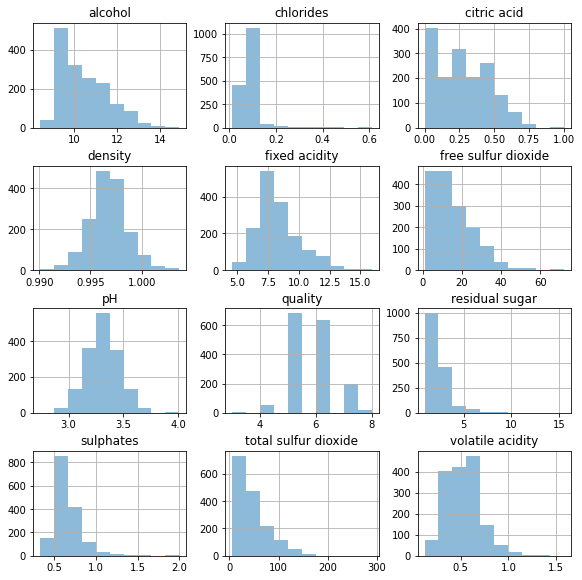

In [ ]:
import matplotlib.pyplot as plt

df.hist(alpha=0.5, figsize=(8,8))
plt. tight_layout(pad=0.5)
plt.show()

**b. Bar charts**

The plt.bar() creates the bar chart for us. If you do not explicitly choose a color, then, despite doing multiple plots, all bars will look the same. This gives us a change to cover a new Matplotlib customization option, however. You can use color to color just about any kind of plot, using colors like g for green, b for blue, r for red, and so on. You can also use hex color codes, like #191970

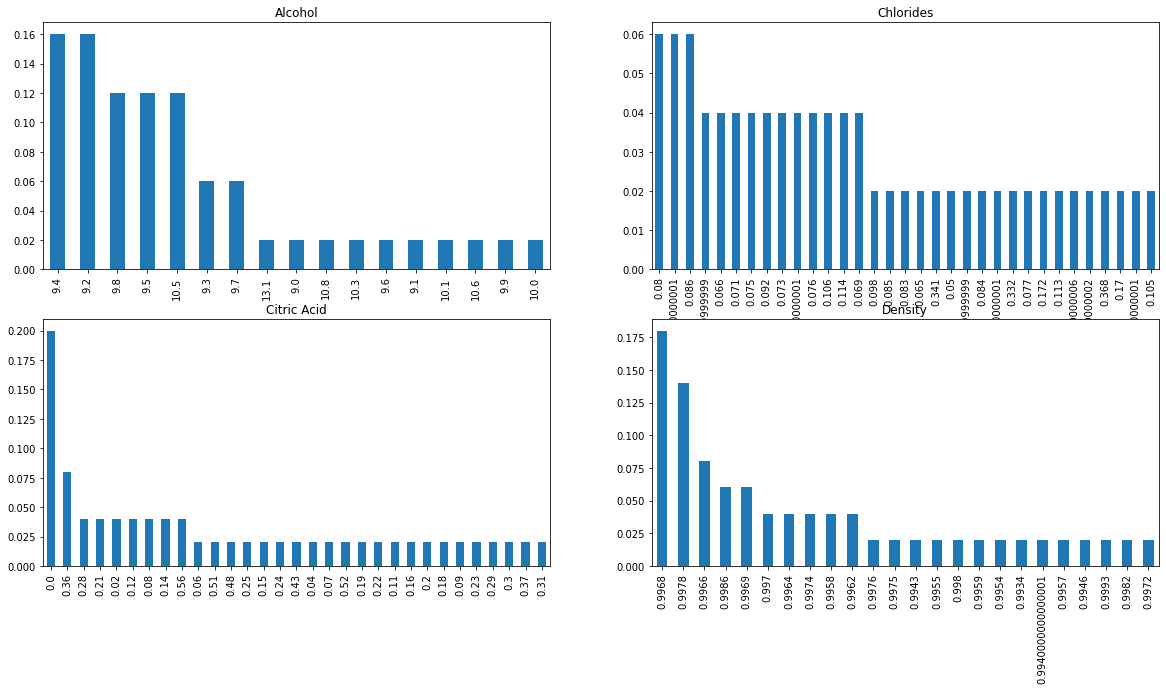

In [ ]:
df1=df.head(50)
plt.figure(1)
plt.subplot(221)
df1['alcohol'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Alcohol')

plt.subplot(222)
df1['chlorides'].value_counts(normalize=True).plot.bar(title= 'Chlorides')

plt.subplot(223)
df1['citric acid'].value_counts(normalize=True).plot.bar(title= 'Citric Acid')

plt.subplot(224)
df1['density'].value_counts(normalize=True).plot.bar(title= 'Density')

plt.show()



**c. Density Plots**

A density plot appears to be an abstracted histogram. Each bin has a smooth curve drawn through its top. Your eyes can rest now.

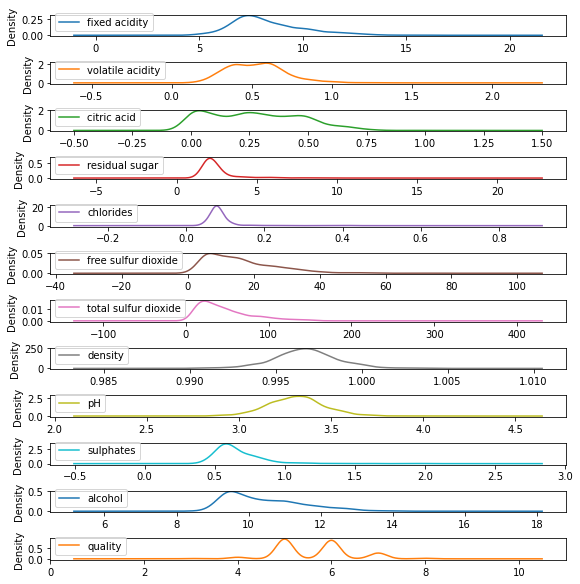

In [ ]:
df.plot(kind='density',subplots=True,sharex=False, figsize=(8,8))
plt.tight_layout(pad=0.5)
plt.show()

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


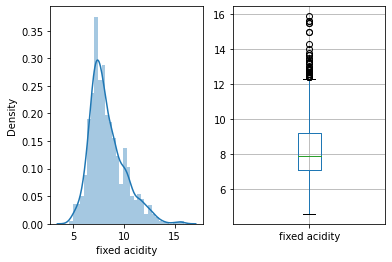

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(1)
plt.subplot(121)

sns.distplot(df['fixed acidity']);

plt.subplot(122)

df.boxplot(['fixed acidity'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


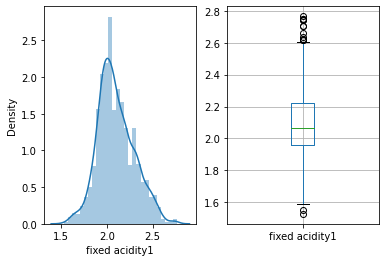

In [ ]:
import numpy as np

df['fixed acidity1']=np.log(df['fixed acidity'])
plt.figure(1)
plt.subplot(121)

sns.distplot(df['fixed acidity1']);

plt.subplot(122)

df.boxplot(['fixed acidity1'])

In [ ]:
#Method 2:
import numpy as np  
import seaborn as sns

Q1 = np.percentile(df['fixed acidity'], 25, interpolation = 'midpoint')
#Q2 = np.percentile(df['fixed acidity'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(df['fixed acidity'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)
outlier =[]
for x in df['fixed acidity']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print(' outlier in the dataset is', outlier)

Interquartile range is 2.0999999999999996
low_limit is 3.95
up_limit is 12.349999999999998
 outlier in the dataset is [12.8, 12.8, 15.0, 15.0, 12.5, 13.3, 13.4, 12.4, 12.5, 13.8, 13.5, 12.6, 12.5, 12.8, 12.8, 14.0, 13.7, 13.7, 12.7, 12.5, 12.8, 12.6, 15.6, 12.5, 13.0, 12.5, 13.3, 12.4, 12.5, 12.9, 14.3, 12.4, 15.5, 15.5, 15.6, 13.0, 12.7, 13.0, 12.7, 12.4, 12.7, 13.2, 13.2, 13.2, 15.9, 13.3, 12.9, 12.6, 12.6]


In [ ]:
#Capping outliers
new_df_cap = df.copy()
new_df_cap['fixed acidity'] = np.where(new_df_cap['fixed acidity'] > up_lim,up_lim,np.where(new_df_cap['fixed acidity'] < low_lim,low_lim,new_df_cap['fixed acidity']))

In [ ]:
print(up_lim)

12.349999999999998


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


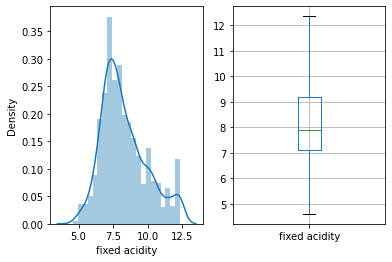

In [ ]:
plt.figure(1)
plt.subplot(121)

sns.distplot(new_df_cap['fixed acidity']);

plt.subplot(122)

new_df_cap.boxplot(['fixed acidity'])

In [ ]:
#method 3:
new_df = df.copy()
# calculate summary statistics
data_mean, data_std = new_df['fixed acidity'].mean(), new_df['fixed acidity'].std()
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
print("lower bound--->",lower)
print("upper bound--->",upper)

lower bound---> 3.096348318912736
upper bound---> 13.54292622767894


In [ ]:
# remove outliers
outliers_removed = [x for x in new_df['fixed acidity'] if x > lower and x < upper]
print(outliers_removed)

[7.4, 7.8, 7.8, 11.2, 7.4, 7.4, 7.9, 7.3, 7.8, 7.5, 6.7, 7.5, 5.6, 7.8, 8.9, 8.9, 8.5, 8.1, 7.4, 7.9, 8.9, 7.6, 7.9, 8.5, 6.9, 6.3, 7.6, 7.9, 7.1, 7.8, 6.7, 6.9, 8.3, 6.9, 5.2, 7.8, 7.8, 8.1, 5.7, 7.3, 7.3, 8.8, 7.5, 8.1, 6.8, 4.6, 7.7, 8.7, 6.4, 5.6, 8.8, 6.6, 6.6, 8.6, 7.6, 7.7, 10.2, 7.5, 7.8, 7.3, 8.8, 7.7, 7.5, 7.0, 7.2, 7.2, 7.5, 6.6, 9.3, 8.0, 7.7, 7.7, 7.7, 8.3, 9.7, 8.8, 8.8, 6.8, 6.7, 8.3, 6.2, 7.8, 7.4, 7.3, 6.3, 6.9, 8.6, 7.7, 9.3, 7.0, 7.9, 8.6, 8.6, 7.7, 5.0, 4.7, 6.8, 7.0, 7.6, 8.1, 8.3, 7.8, 8.1, 8.1, 7.2, 8.1, 7.8, 6.2, 8.0, 8.1, 7.8, 8.4, 8.4, 10.1, 7.8, 9.4, 8.3, 7.8, 8.8, 7.0, 7.3, 8.8, 7.3, 8.0, 7.8, 9.0, 8.2, 8.1, 8.0, 6.1, 8.0, 5.6, 5.6, 6.6, 7.9, 8.4, 8.3, 7.2, 7.8, 7.8, 8.4, 8.3, 5.2, 6.3, 5.2, 8.1, 5.8, 7.6, 6.9, 8.2, 7.3, 9.2, 7.5, 7.5, 7.1, 7.1, 7.1, 7.1, 7.1, 6.8, 7.6, 7.6, 7.8, 7.4, 7.3, 7.8, 6.8, 7.3, 6.8, 7.5, 7.9, 8.0, 8.0, 7.4, 7.3, 6.9, 7.3, 7.5, 7.0, 8.8, 8.8, 8.9, 7.2, 6.8, 6.7, 8.9, 7.4, 7.7, 7.9, 7.9, 8.2, 6.4, 6.8, 7.6, 7.6, 7.8, 7.3, 11.5, 5.4, 

**Visualizing Data-Multivariate Plots in Python Machine Learning**

A multivariate analysis examines more than two variables. For two variables, we call it bivariate.

**a. Correlation Matrix Plot**

Such a plot denotes how changes between two variables relate. Two variables that change in the same direction are positively correlated. A change in opposite directions implies negative correlation.

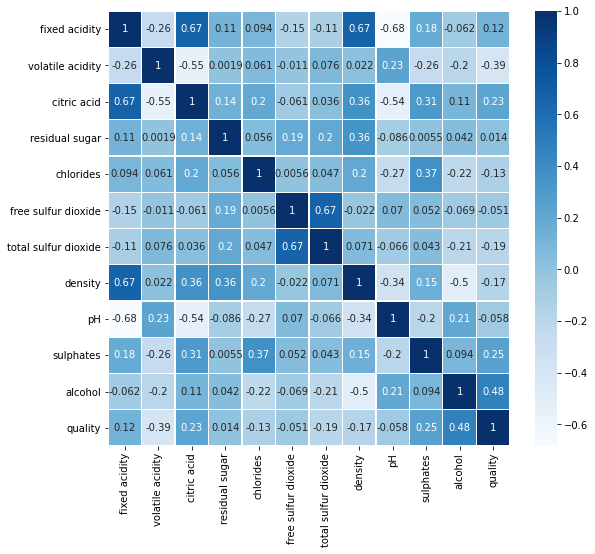

In [ ]:
import seaborn as sns
plt.figure(figsize=(9, 8))
corr_matrix = df.corr()
sns.heatmap(data=corr_matrix,cmap='Blues', annot=True, linewidths=0.2)